In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Working with OS module

To explore your current working directory. You can use the Python `os` library, which consists of miscellaneous `operating system interfaces`.

In [2]:
## The first line of the following code imports the library os
import os

In [4]:
## the second line stores the name of the current directory in a string called wd
wd = os.getcwd()
wd

'C:\\Users\\User\\CODE\\DataCamp\\2. Importing and cleaning data\\1. Importing Data'

In [5]:
## the third outputs the contents of the directory in a list to the shell.
os.listdir(wd)

['.ipynb_checkpoints',
 '1. Importing Text and CSV files.ipynb',
 '2. Importing Files.ipynb',
 'course_scholarship.txt',
 'digits.csv',
 'seaslugs.txt',
 'titanic_corrupt.txt',
 'train.csv']

### Pickle File

`Pickled` files are `Serialized`.
`Serialize = convert object to bytestream`

There are a number of datatypes that cannot be saved easily to flat files, such as `lists and dictionaries`. If you want your files to be human readable, you may want to save them as `text files` in a clever manner.

However, if you merely want to be able to import them into Python, you can `serialize` them. All this means is `converting` the `object` into a `sequence of bytes, or a bytestream.`

In [2]:
# Import pickle package
import pickle

# Open pickle file and load data: d
# "rb" is used for reading binary files
with open('data.pkl', "rb") as file:
    d = pickle.load(file)

# Print d
print(d)

FileNotFoundError: [Errno 2] No such file or directory: 'data.pkl'

In [ ]:
# Print datatype of d
print(type(d))

### Excel Files

Given an Excel file imported into a variable `spreadsheet`, you can retrieve a list of the sheet names using the attribute `spreadsheet.sheet_names`.

In [3]:
# Import pandas
import pandas as pd

# Assign spreadsheet filename: file
file = 'battledeath.xlsx'

# Load spreadsheet: xls
xls = pd.ExcelFile(file)

# Print sheet names
xls.sheet_names

['2002', '2004']

In [5]:
## Load the sheet '2004' into the DataFrame df1 using its name as a string.
df1 = xls.parse("2004")

# Print the head of the DataFrame df1
df1.head()

,War(country),2004
0,Afghanistan,9.451028
1,Albania,0.130354
2,Algeria,3.407277
3,Andorra,0.000000
4,Angola,2.597931


In [6]:
## Load the sheet 2002 into the DataFrame df2 using its index (0).
df2 = xls.parse(0)

# Print the head of the DataFrame df2
df2.head()

,"War, age-adjusted mortality due to",2002
0,Afghanistan,36.083990
1,Albania,0.128908
2,Algeria,18.314120
3,Andorra,0.000000
4,Angola,18.964560


In [12]:
## Parse the first sheet by index. In doing so, 
## skip the first row of data and name the columns 'Country' and 'AAM due to War (2002)' using the argument names. 
## The values passed to skiprows and names all need to be of type list.

df1 = xls.parse(0, skiprows= [0], 
names=['Country', 'AAM due to War (2002)'])

# Print the head of the DataFrame df1
print(df1.head())

## Parse the second sheet by index. In doing so, 
## parse only the first column with the usecols parameter, skip the first row and rename the column 'Country'. 
## The argument passed to usecols also needs to be of type list.

df2 = xls.parse(0, usecols= [0], skiprows=[0], names=["Country"])

# Print the head of the DataFrame df2
print(df2.head())

               Country  AAM due to War (2002)
0              Albania               0.128908
1              Algeria              18.314120
2              Andorra               0.000000
3               Angola              18.964560
4  Antigua and Barbuda               0.000000
               Country
0              Albania
1              Algeria
2              Andorra
3               Angola
4  Antigua and Barbuda


### SAS File

In [6]:
# Import the module SAS7BDAT from the library sas7bdat.
from sas7bdat import SAS7BDAT

# In the context of the file 'sales.sas7bdat', 
# load its contents to a DataFrame df_sas, using the method to_data_frame() on the object file.
with SAS7BDAT('sales.sas7bdat') as file:
    df_sas = file.to_data_frame()

# Print head of DataFrame
print(df_sas.head())

# Plot histogram of DataFrame features (pandas and pyplot already imported)
pd.DataFrame.hist(df_sas[['P']])
plt.ylabel('count')
plt.show()

ModuleNotFoundError: No module named 'sas7bdat'

### Stata File

  wbcode               country  disa1  disa2  disa3  disa4  disa5  disa6  \
0    AFG           Afghanistan   0.00   0.00   0.76   0.73    0.0   0.00   
1    AGO                Angola   0.32   0.02   0.56   0.00    0.0   0.00   
2    ALB               Albania   0.00   0.00   0.02   0.00    0.0   0.00   
3    ARE  United Arab Emirates   0.00   0.00   0.00   0.00    0.0   0.00   
4    ARG             Argentina   0.00   0.24   0.24   0.00    0.0   0.23   

   disa7  disa8  ...  disa16  disa17  disa18  disa19  disa20  disa21  disa22  \
0   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
1   0.56    0.0  ...     0.0     0.4     0.0    0.61    0.00     0.0    0.99   
2   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
3   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.00     0.0    0.00   
4   0.00    0.0  ...     0.0     0.0     0.0    0.00    0.05     0.0    0.00   

   disa23  disa24  disa25  
0    0.02    0.00    0.00  
1    0

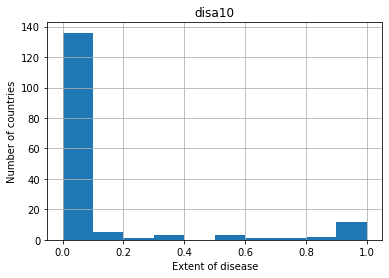

In [7]:
# Use pd.read_stata() to load the file 'disarea.dta' into the DataFrame df.
df = pd.read_stata("disarea.dta")

# Print the head of the DataFrame df
print(df.head())

# Visualize your results by plotting a histogram of the column disa10
pd.DataFrame.hist(df[['disa10']])
plt.xlabel('Extent of disease')
plt.ylabel('Number of countries')
plt.show()


### HDF5 File

In [7]:
# Import the package h5py
import numpy as np
import h5py

# Assign the name of the file to the variable file
file = 'LIGO_data.hdf5'

# Load the file as read only into the variable data
data = h5py.File(file, "r")
data

<HDF5 file "LIGO_data.hdf5" (mode r)>

In [8]:
# Print the datatype of the loaded file
print(type(data))

# Print the names of the groups in the HDF5 file
for key in data.keys():
    print(key)

<class 'h5py._hl.files.File'>
meta
quality
strain


In [9]:
# Assign the HDF5 group data['strain'] to group
group = data["strain"]

# In the for loop, print out the keys of the HDF5 group in group.
for key in group.keys():
    print(key)

Strain


In [24]:
# Assign to the variable strain the values of the time series data data['strain']['Strain'] using the attribute .value.
strain = data["strain"]["Strain"].value
print(strain)

[-1.77955839e-18 -1.76552067e-18 -1.71049117e-18 ... -1.76375155e-18
 -1.72364846e-18 -1.71969299e-18]


<ipython-input-24-721779b46424>:2: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  strain = data["strain"]["Strain"].value


In [25]:
print(data['meta']['Description'].value, data['meta']['Detector'].value)

b'Strain data time series from LIGO' b'L1'


<ipython-input-25-b61096ae186d>:1: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  print(data['meta']['Description'].value, data['meta']['Detector'].value)


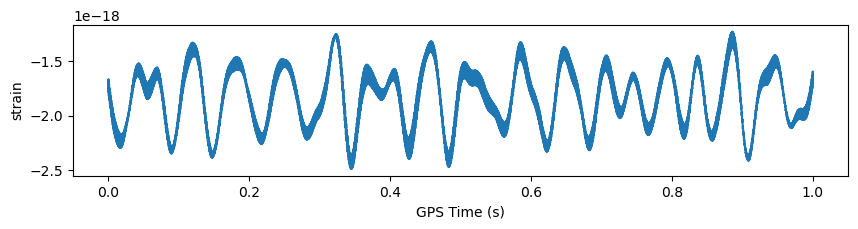

In [30]:
# Set num_samples equal to 10000, the number of time points we wish to sample.
num_samples = 10000

# Set time vector
time = np.arange(0, 1, 1/num_samples)

# Plot data
plt.figure(figsize = (10,2), dpi=100)
plt.plot(time, strain[:num_samples])
plt.xlabel('GPS Time (s)')
plt.ylabel('strain')
plt.show()

In [8]:
# Import package
import scipy.io

# Load MATLAB file: mat
mat = scipy.io.loadmat("ja_data2.mat")  

# Print the datatype type of mat
print(type(mat))

<class 'dict'>


dict_keys(['__header__', '__version__', '__globals__', 'rfpCyt', 'rfpNuc', 'cfpNuc', 'cfpCyt', 'yfpNuc', 'yfpCyt', 'CYratioCyt'])
<class 'numpy.ndarray'>
(200, 137)


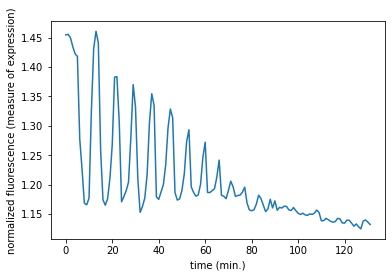

In [9]:
# Print the keys of the MATLAB dictionary
print(mat.keys())

# Print the type of the value corresponding to the key 'CYratioCyt'
print(type(mat['CYratioCyt']))

# Print the shape of the value corresponding to the key 'CYratioCyt'
print(mat['CYratioCyt'].shape)

# Subset the array and plot it
data = mat['CYratioCyt'][25, 5:]
fig = plt.figure()
plt.plot(data)
plt.xlabel('time (min.)')
plt.ylabel('normalized fluorescence (measure of expression)')
plt.show()